In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('dataset/CarPrice.csv')

In [56]:
pd.set_option('display.max_columns', None)
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [57]:
# Optionnel : un style plus clean
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

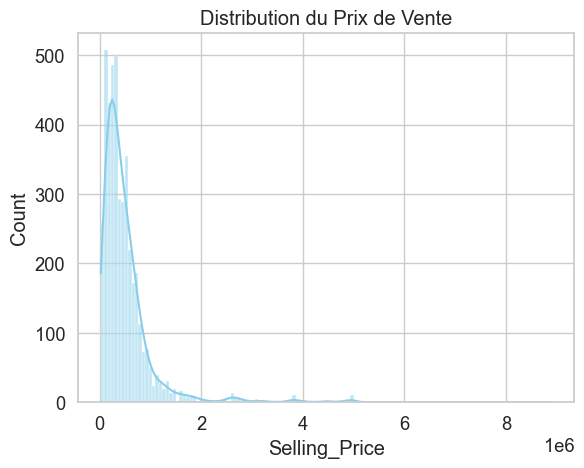

In [58]:
sns.histplot(df['Selling_Price'], kde=True, color='skyblue')
plt.title('Distribution du Prix de Vente')
plt.show()

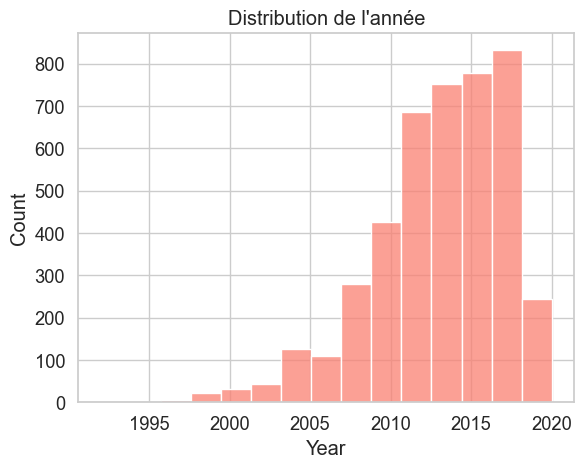

In [59]:
sns.histplot(df['Year'], bins=15, color='salmon')
plt.title('Distribution de l\'année')
plt.show()

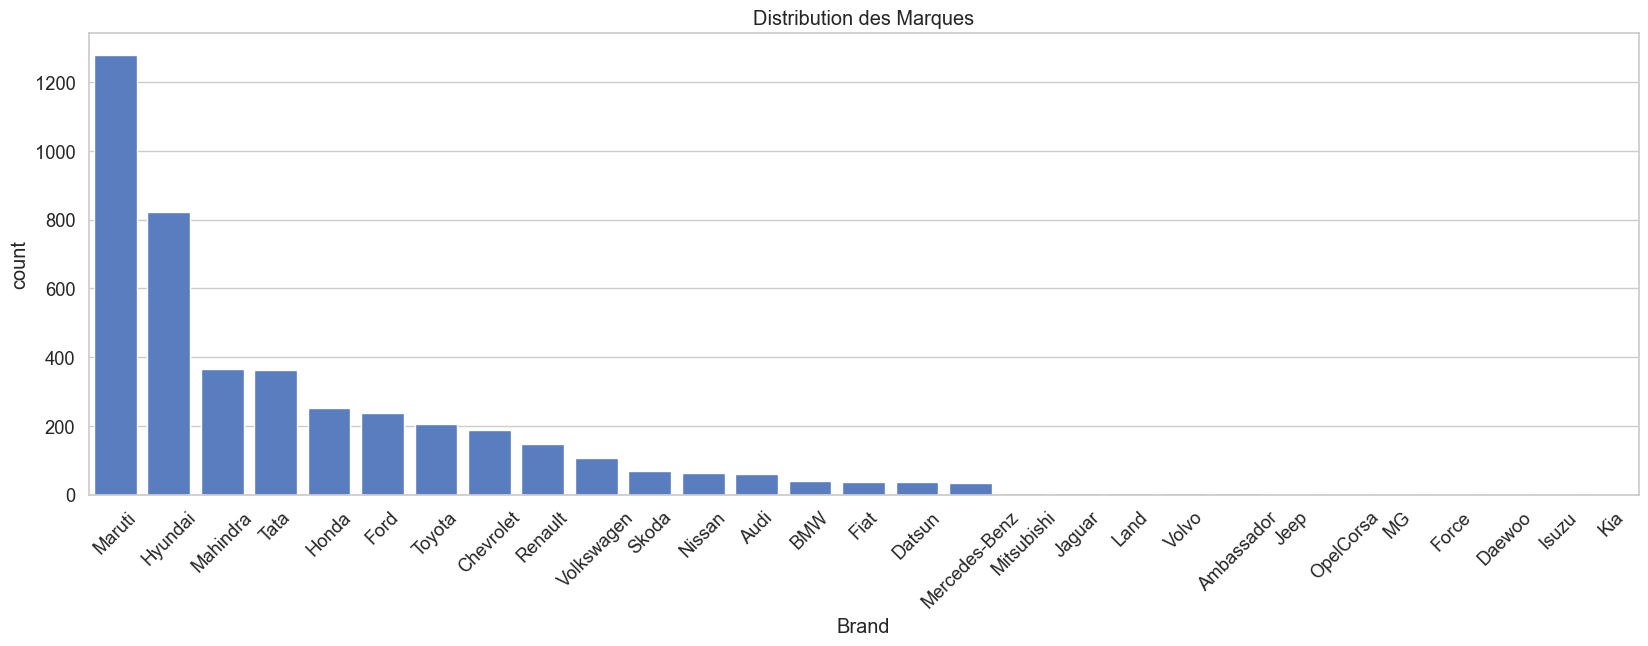

In [60]:
plt.figure(figsize=(20,6))
sns.countplot(x='Brand', data=df, order=df['Brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution des Marques')
plt.show()

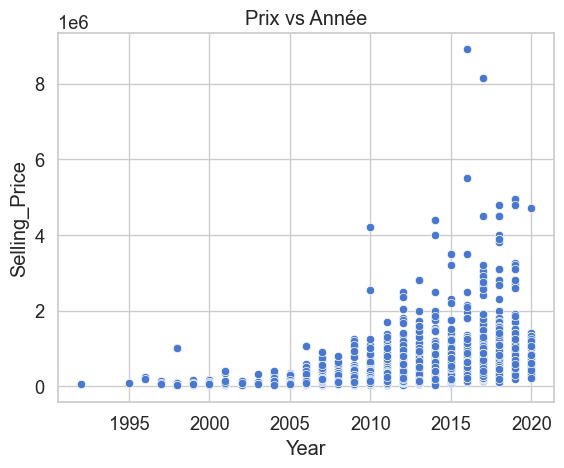

In [61]:
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title('Prix vs Année')
plt.show()

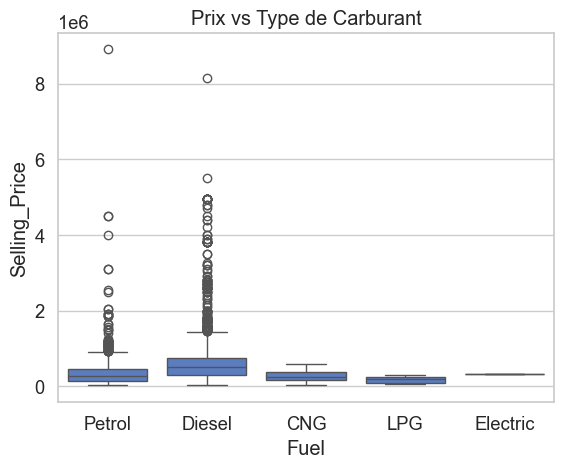

In [62]:
sns.boxplot(x='Fuel', y='Selling_Price', data=df)
plt.title('Prix vs Type de Carburant')
plt.show()

In [63]:
df['Model'].nunique()

1491

In [64]:
df = df.drop(columns=['Model'])
df.head()

,Brand,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [67]:
df['Seller_Type'].value_counts()

Seller_Type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

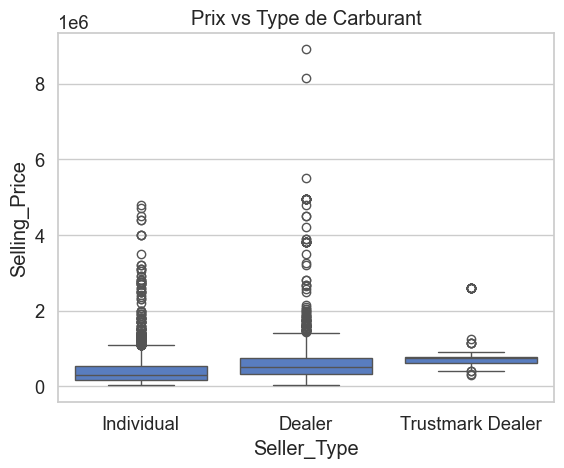

In [69]:
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Prix vs Type de Carburant')
plt.show()

In [68]:
df['Owner'].value_counts()

Owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

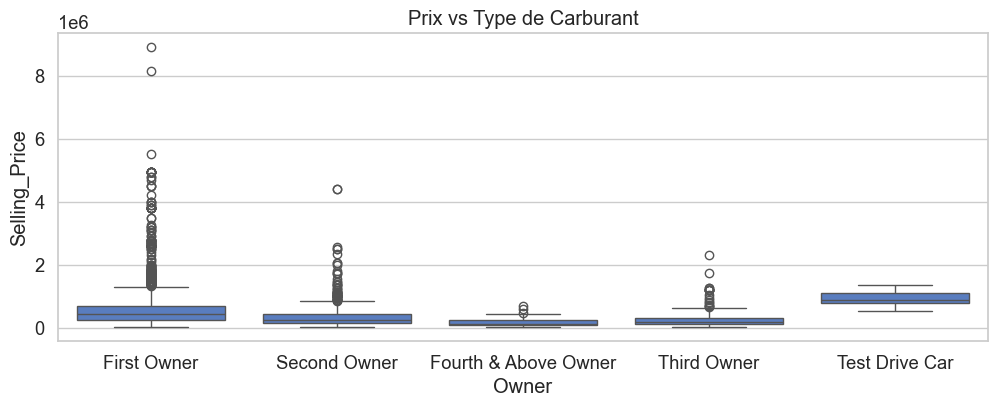

In [74]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Owner', y='Selling_Price', data=df)
plt.title('Prix vs Type de Carburant')
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   KM_Driven      4340 non-null   int64 
 4   Fuel           4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [76]:
df['Car_Age'] = 2025 - df['Year']
df = df.drop(columns=['Year']) 

In [77]:
df.head()

,Brand,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Age
0,Maruti,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti,135000,50000,Petrol,Individual,Manual,First Owner,18
2,Hyundai,600000,100000,Diesel,Individual,Manual,First Owner,13
3,Datsun,250000,46000,Petrol,Individual,Manual,First Owner,8
4,Honda,450000,141000,Diesel,Individual,Manual,Second Owner,11


In [78]:
df['Is_First_Owner'] = df['Owner'].apply(lambda x: 1 if x == 'First Owner' else 0)
df = df.drop(columns=['Owner'])

In [79]:
df.head()

,Brand,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Car_Age,Is_First_Owner
0,Maruti,60000,70000,Petrol,Individual,Manual,18,1
1,Maruti,135000,50000,Petrol,Individual,Manual,18,1
2,Hyundai,600000,100000,Diesel,Individual,Manual,13,1
3,Datsun,250000,46000,Petrol,Individual,Manual,8,1
4,Honda,450000,141000,Diesel,Individual,Manual,11,0


In [80]:
# 2. Séparation features / cible
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [82]:
# 3. Définition des colonnes catégorielles et numériques
categorical_features = ['Brand', 'Fuel', 'Seller_Type', 'Transmission']
numeric_features = [col for col in X.columns if col not in categorical_features]

# 4. Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Les colonnes numériques passent telles quelles
)

# 5. Pipeline complet avec modèle
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=101))
])

# 6. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [83]:
# 7. GridSearch pour optimiser hyperparamètres
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# 8. Entraînement avec GridSearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step..._state=101))])
,param_grid,"{'regressor__max_depth': [None, 10, ...], 'regressor__min_samples_split': [2, 5], 'regressor__n_estimators': [100, 200]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...)]"


In [85]:
print("Meilleur score CV (MAE négatif) :", grid_search.best_score_)

Meilleur score CV (MAE négatif) : -131100.35318835516


In [86]:
best_mae_cv = -grid_search.best_score_
print(f"MAE CV (validation croisée) : {best_mae_cv:.2f}")

MAE CV (validation croisée) : 131100.35


In [87]:
y_pred = grid_search.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
print(f"MAE sur test set : {mae_test:.2f}")

MAE sur test set : 108861.70


c:\Users\Yvan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [90]:
r2_score(y_test, y_pred)

0.8865411464434628

In [ ]:
import joblib

#grid_search.best_estimator_ contient tout : préprocessing + meilleur modèle
joblib.dump(grid_search.best_estimator_, 'model/car_price_model.pkl')

['model/car_price_model.pkl']

In [92]:
model = joblib.load('model/car_price_model.pkl')

# Exemple prédiction
input_data = pd.DataFrame([{
    'Brand': 'Hyundai',
    'Fuel': 'Petrol',
    'Seller_Type': 'Individual',
    'Transmission': 'Manual',
    'KM_Driven': 50000,
    'Car_Age': 8,
    'Is_First_Owner': 1
}])

pred = model.predict(input_data)
print(f"Prix prédit : {pred[0]:.2f}")

Prix prédit : 466011.41
